<a href="https://colab.research.google.com/github/missattack/RedesNeurais/blob/main/MNIST_RedeNeural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import tensorflow as tf

from tensorflow import keras

import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist 

In [47]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print("x_train shape:", X_train.shape, "y_train shape:", Y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (10000,)


In [48]:
# Nro de treino e teste do dataset
print(X_train.shape[0], 'cj de treino')
print(X_test.shape[0], 'cj de teste')

60000 cj de treino
10000 cj de teste


Visualiza as imagens do dataset

In [62]:
classes_dataset = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}

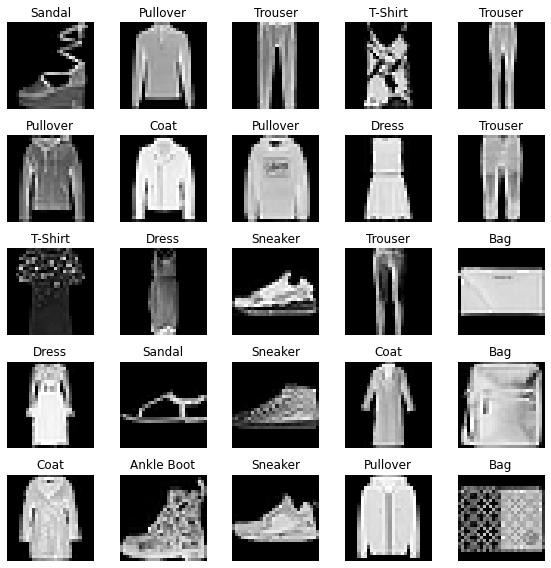

In [63]:
columns = 5
rows = 5
fig = plt.figure(figsize=(8, 8))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(X_train))
    img = X_train[data_idx].reshape([28, 28])
    label = classes_dataset[Y_train[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

Normaliza a dimensão dos dados para a mesma escala

In [64]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [65]:
print("Nro de dados do treino: " + str(len(X_train)))
print("Nro de dados do teste:" + str(len(X_test)))

Nro de dados do treino: 60000
Nro de dados do teste:10000


Split dos dados em treino/validação/teste: 5.000 para validação e 55.000 para treino



In [66]:
(X_train, X_valid) = X_train[5000:], X_train[:5000] 
(Y_train, Y_valid) = Y_train[5000:], Y_train[:5000]

In [67]:
w, h = 28, 28
X_train = X_train.reshape(X_train.shape[0], w, h, 1)
X_valid = X_valid.reshape(X_valid.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)

In [68]:
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_valid = tf.keras.utils.to_categorical(Y_valid, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

In [69]:
print("X_train shape:", X_train.shape, "Y_train shape:", Y_train.shape)

X_train shape: (55000, 28, 28, 1) Y_train shape: (55000, 10)


In [70]:
print(X_train.shape[0], 'dados de treino')
print(X_valid.shape[0], 'dados de validacao')
print(X_test.shape[0], 'dados teste')

55000 dados de treino
5000 dados de validacao
10000 dados teste


Construção do modelo

In [71]:
modelo = tf.keras.Sequential()

modelo.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
modelo.add(tf.keras.layers.MaxPooling2D(pool_size=2))
modelo.add(tf.keras.layers.Dropout(0.3))

modelo.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
modelo.add(tf.keras.layers.MaxPooling2D(pool_size=2))
modelo.add(tf.keras.layers.Dropout(0.3))

modelo.add(tf.keras.layers.Flatten())
modelo.add(tf.keras.layers.Dense(256, activation='relu'))
modelo.add(tf.keras.layers.Dropout(0.5))
modelo.add(tf.keras.layers.Dense(10, activation='softmax'))

In [72]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [113]:
modelo.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Treina o Modelo

In [114]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

In [115]:
modelo.fit(X_train,
         Y_train,
         batch_size=64,
         epochs=10,
         validation_data=(X_valid, Y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - ETA: 0s - loss: 0.6075 - accuracy: 0.7759

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

Epoch 1: val_loss improved from inf to 0.38539, saving model to model.weights.best.hdf5
860/860 [==============================] - 221s 93ms/step - loss: 0.6075 - accuracy: 0.7759 - val_loss: 0.3854 - val_accuracy: 0.8676
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.4228 - accuracy: 0.8458
Epoch 2: val_loss improved from 0.38539 to 0.32837, saving model to model.weights.best.hdf5
860/860 [==============================] - 81s 94ms/step - loss: 0.4229 - accuracy: 0.8457 - val_loss: 0.3284 - val_accuracy: 0.8828
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3744 - accuracy: 0.8641
Epoch 3: val_loss

In [116]:
#modelo com a melhor acurácia
modelo.load_weights('model.weights.best.hdf5') 

In [117]:
#melhor acurácia
acuracia = modelo.evaluate(X_test, Y_test, verbose=0)

print('\n', 'Teste da acurácia:', acuracia[1])


 Teste da acurácia: 0.907800018787384


Apresenta predição do melhor modelo

313/313 [==============================] - 5s 16ms/step


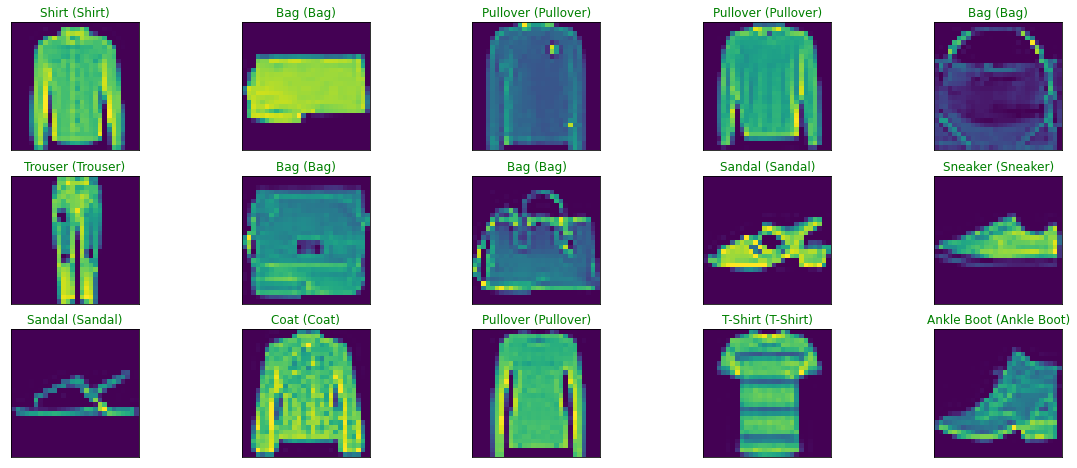

In [118]:
melhor_modelo = modelo.predict(X_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(melhor_modelo[index])
    true_index = np.argmax(Y_test[index])
    ax.set_title("{} ({})".format(classes_dataset[predict_index], 
                                  classes_dataset[true_index]),
                                  color=("green" if predict_index == true_index else "red"))